# string model 1 - default network

In [1]:
import boolean2_helper as bm
import network_drawer as draw
from model_builder_1 import string2definition, add_processes2definition, add_mtb2definition



In [2]:
mtb = ["Eis" , "esxA" ,"esxH_esxG" ,"IpdC" ,"ndkA" ,"PPE2" ,"PstS1" ,"PtpA" ,"Rv2779c" ,"SapM"]
hit = ['AP1B1','ARL10','ASPSCR1','CHMP2A','KIF6','CLVS2','CDC42EP3','CHMP2B','GGA1','GOLT1B','HIP1R','VPS26B','PKD1L2','RIMS2','VCP']
process = ['Phagosome_acidification','Phagosome_maturation','Phagolysosome_assembly']


In [3]:
definition = string2definition('string-edgelist.csv', True)
definition = add_processes2definition(definition, 'process-edgelist.csv', True)
hit = [factor for factor in hit if factor in definition]
hit

['AP1B1', 'ASPSCR1', 'CHMP2A', 'CLVS2', 'CHMP2B', 'GGA1', 'HIP1R', 'VCP']

1 mtb on/off

In [4]:
mtb_off = add_mtb2definition(definition, 'mtb-edgelist.csv', False)
mtb = [factor for factor in mtb if factor in mtb_off]
mtb


['esxA', 'esxH_esxG', 'ndkA', 'PPE2', 'PtpA', 'SapM']

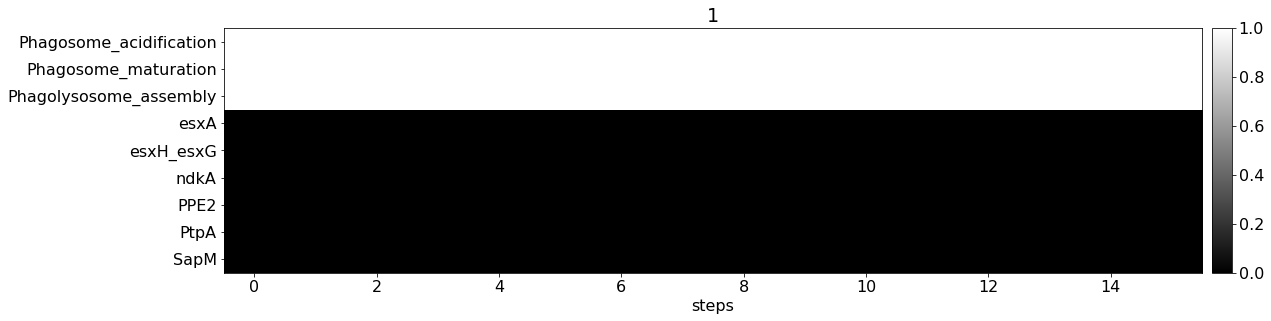

In [5]:
model = bm.run_model(mtb_off)
bm.plot_maps([model.data], nodes=process + mtb, h=4, suptitle='')

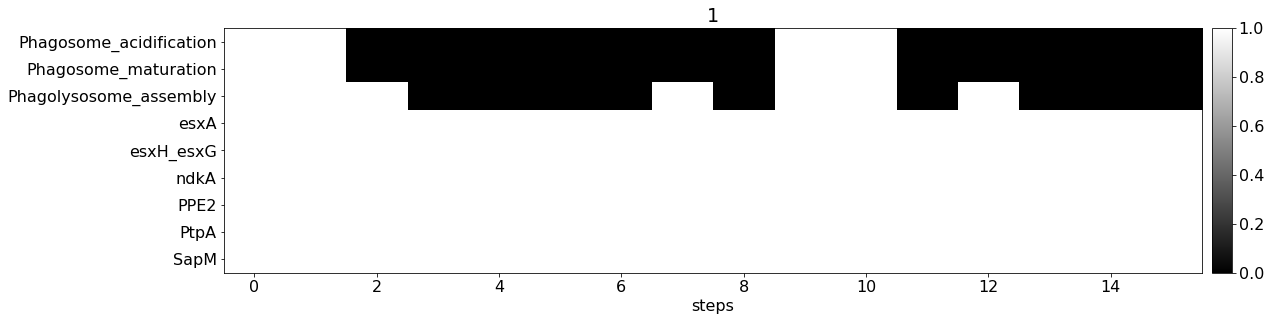

In [6]:
mtb_on = add_mtb2definition(definition, 'mtb-edgelist.csv', 'True')
model = bm.run_model(mtb_on)
bm.plot_maps([model.data], nodes=process + mtb, h=4, suptitle='')

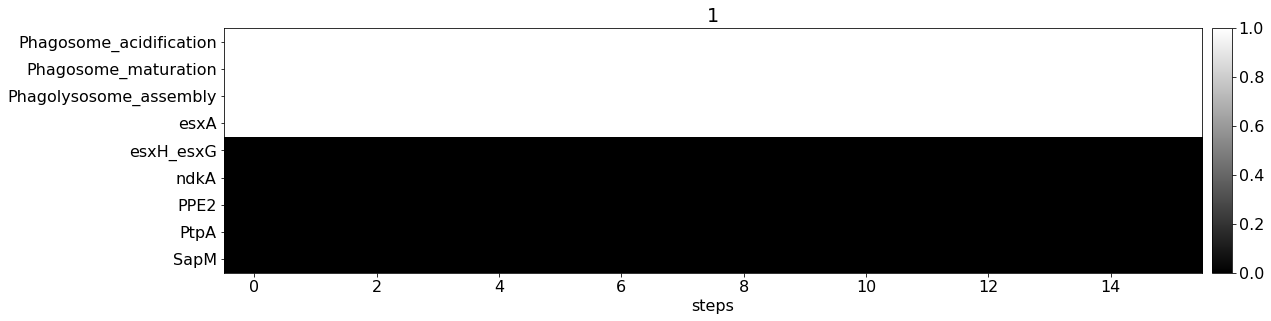

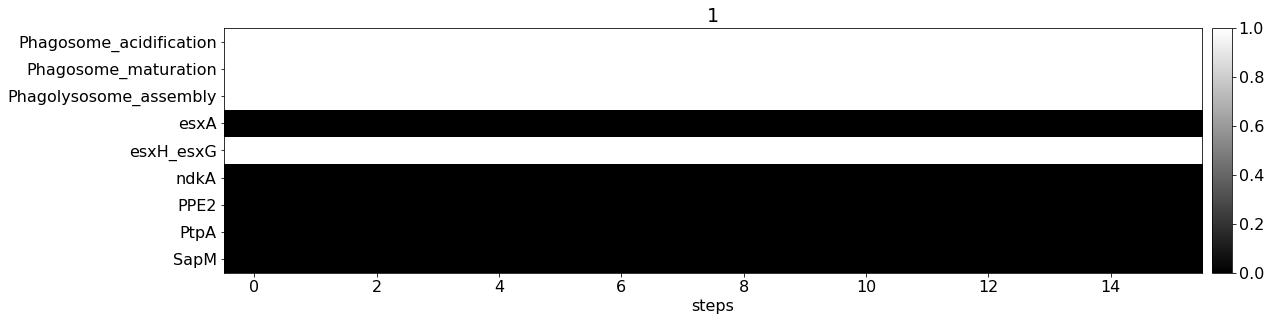

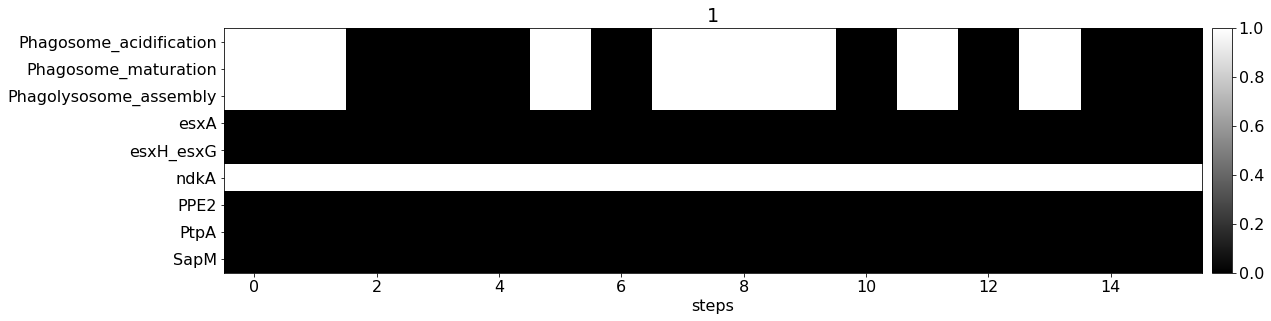

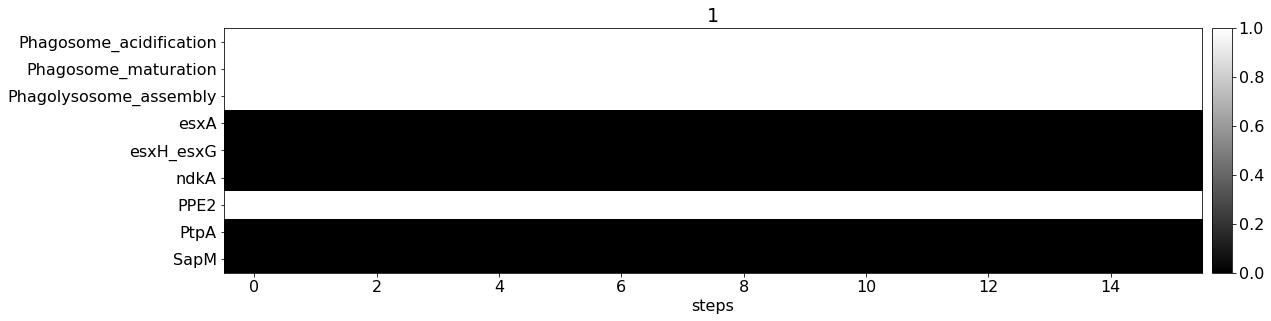

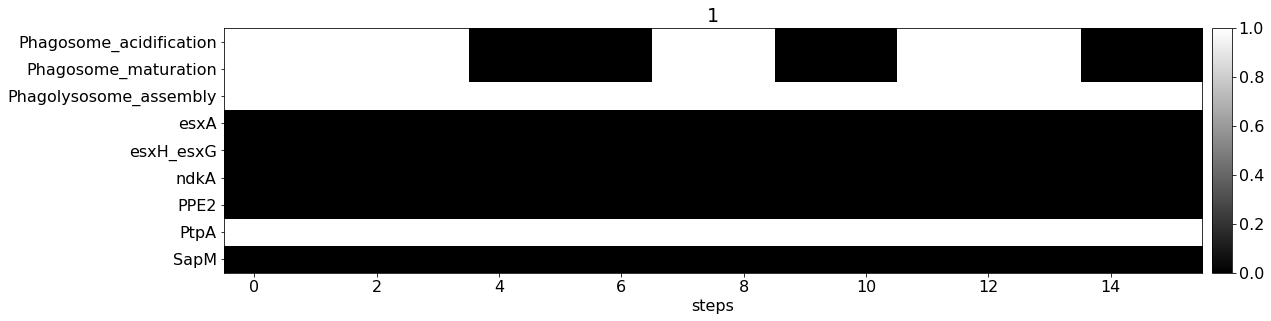

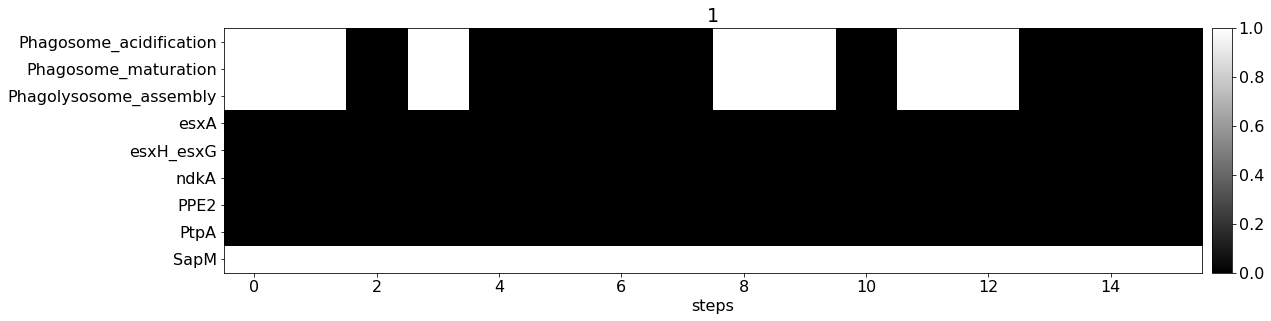

In [7]:
for factor in mtb:
    mtb_test = bm.switch(mtb_off, on=[factor])
    model = bm.run_model(mtb_test)
    bm.plot_maps([model.data], nodes=process + mtb, h=4, suptitle='')

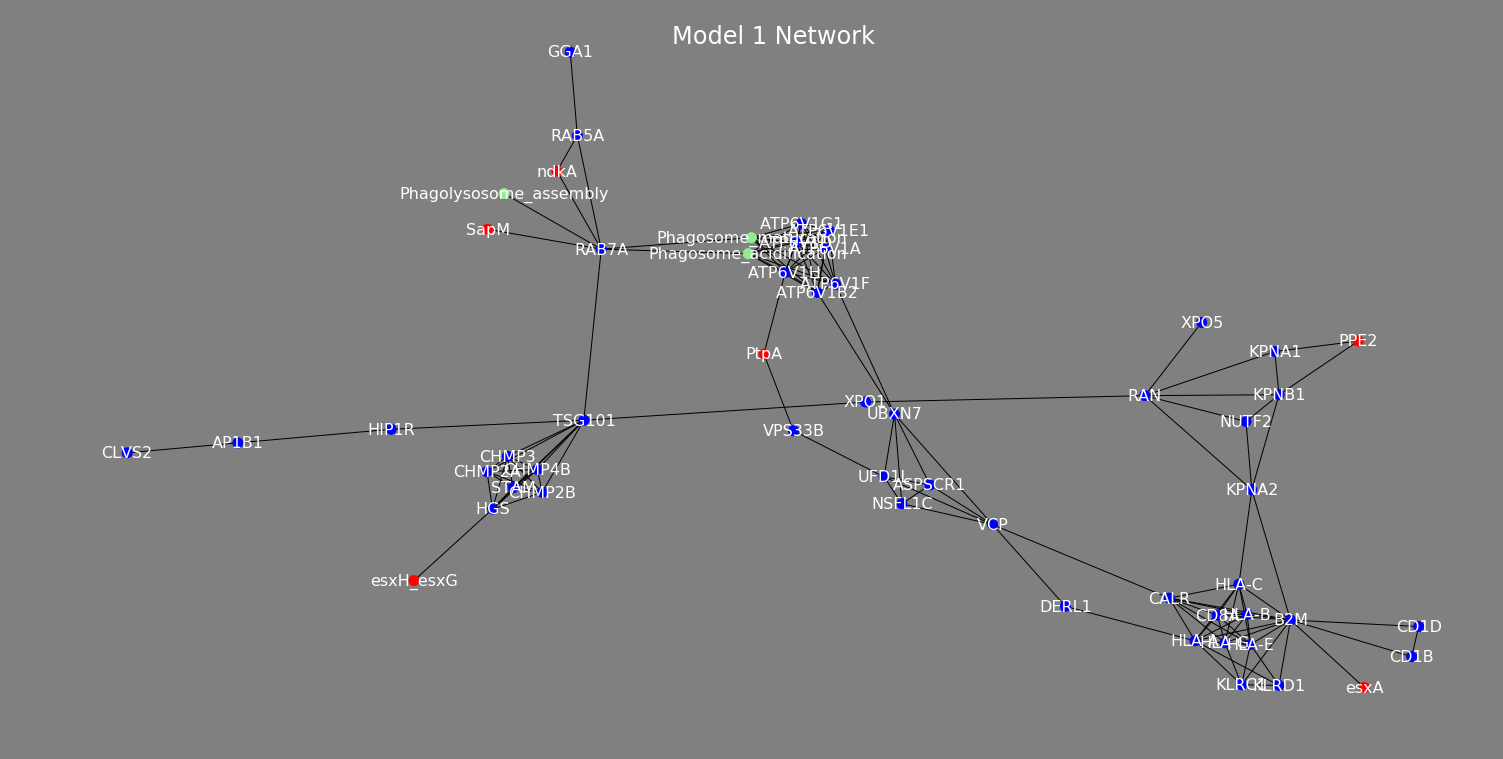

In [8]:
draw.draw_edgelists('string-edgelist.csv', 
                    add_mtb='mtb-edgelist.csv', 
                    add_process='process-edgelist.csv',
                    title='Model 1 Network'
                   )